
* SOM 은 우선 Map size 를 설정해줍니다. (* 군집분석으로 SOM을 사용할 때에는 군집의 수를 차원의 수로 맞추어 주어야 합니다. )
<br><br>
* 이제 이 Default Map 을 조금씩 수정해서(학습해서 = fit) 데이터 분포 형태에 Map 을 근사시킵니다. 
<br><br>
 
 ![image-2.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_mean_shift_001.png)

### 예제 : iris_data를 som으로 군집분석 해보세요.

In [57]:
# 데이터 로드
import pandas as pd
import numpy as np
iris = pd.read_csv('./data/iris.csv')
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
y = iris['target']
X = iris.drop('target', axis = 1)

In [59]:
# 특성 스케일링
# SOM 이상치에 민감하기 때문에 스케일링이 필요
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

In [60]:
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [8]:
!pip install sklearn_som

In [10]:
# sklearn의 모든 분류기와 마찬가지로 SOM 인스턴스를 빌드하고 SOM.fit()에 맞게 데이터 호출
# iris 데이터셋에 3개의 클래스가 있다는 것을 이미 알고 있으므로 
# 자체 구성 맵에 3 x 1 구조를 사용하지만 실제로는 데이터에 가장 적합한 것을 찾기 위해 다른 구조를 시도해 봐야함

from sklearn_som.som import SOM

In [11]:
# dim : 변수의 개수
iris_som = SOM(m=3, n=1, dim=4)
iris_som.fit(X)

In [12]:
predictions = iris_som.predict(X)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
iris['cluster'] = predictions

In [16]:
iris

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


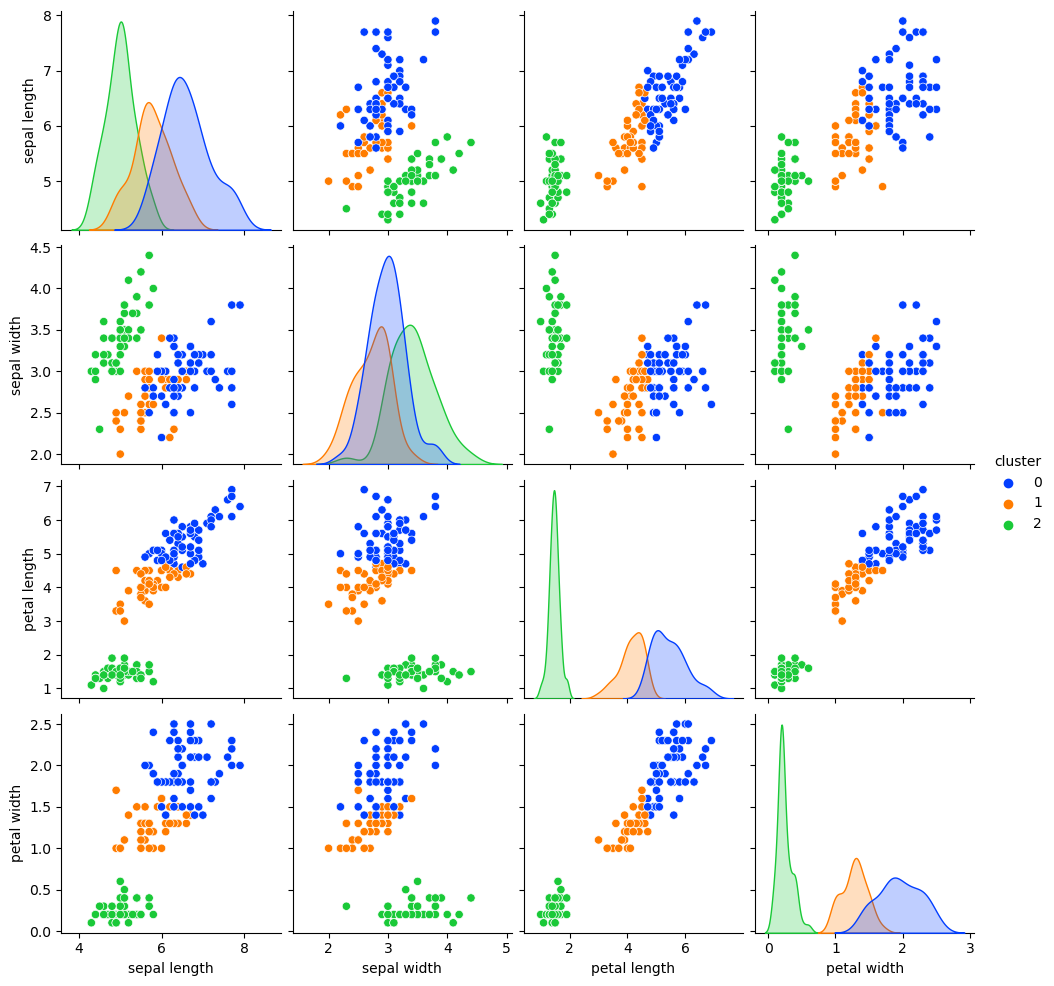

In [20]:
# 원본 traget으로 시각화
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(iris, diag_kind='kde', hue='cluster', palette='bright')
plt.show()

### 17회 기출 
* 데이터를 7:3으로 나누어라 
* train 데이터셋을 som 알고리즘으로 군집화하고 test데이터에 대한 오분류표를 구하라 

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 2021)

In [62]:
som = SOM(m=3, n=1, dim=4)
som.fit(X_train)

In [63]:
y_pred = som.predict(X_test)

In [64]:
result = pd.DataFrame()
result['y_test'] = y_test
result['y_pred'] = y_pred
result

,y_test,y_pred
6,Iris-setosa,2
148,Iris-virginica,0
89,Iris-versicolor,1
116,Iris-virginica,0
12,Iris-setosa,2
33,Iris-setosa,2
67,Iris-versicolor,1
119,Iris-virginica,0
30,Iris-setosa,2
59,Iris-versicolor,1


In [69]:
result.loc[result['y_test']=='Iris-setosa','target_num'] = 2
result.loc[result['y_test']=='Iris-virginica','target_num'] = 0
result.loc[result['y_test']=='Iris-versicolor','target_num'] = 1

In [70]:
result

,y_test,y_pred,target_num
6,Iris-setosa,2,2.0
148,Iris-virginica,0,0.0
89,Iris-versicolor,1,1.0
116,Iris-virginica,0,0.0
12,Iris-setosa,2,2.0
33,Iris-setosa,2,2.0
67,Iris-versicolor,1,1.0
119,Iris-virginica,0,0.0
30,Iris-setosa,2,2.0
59,Iris-versicolor,1,1.0


In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
accuracy_score(result['target_num'], result['y_pred'])

0.8666666666666667

In [76]:
confusion_matrix(result['target_num'], result['y_pred'])

array([[15,  0,  0],
       [ 6,  9,  0],
       [ 0,  0, 15]], dtype=int64)